In [2]:
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./Apple/train_dataset_Apple_with_volume.csv")

In [76]:
df.head(55)

,Date,price_features,volume_features,labels
0,1981-03-10,"[0.09945, 0.094261, 0.087343, 0.089504, 0.0920...","[469033600, 175884800, 105728000, 86441600, 73...",Up
1,1981-03-11,"[0.094261, 0.087343, 0.089504, 0.092099, 0.097...","[175884800, 105728000, 86441600, 73449600, 486...",Up
2,1981-03-12,"[0.087343, 0.089504, 0.092099, 0.09772, 0.1024...","[105728000, 86441600, 73449600, 48630400, 3736...",Up
3,1981-03-13,"[0.089504, 0.092099, 0.09772, 0.102476, 0.1068...","[86441600, 73449600, 48630400, 37363200, 46950...",Up
4,1981-03-16,"[0.092099, 0.09772, 0.102476, 0.1068, 0.112421...","[73449600, 48630400, 37363200, 46950400, 48003...",Up
5,1981-03-17,"[0.09772, 0.102476, 0.1068, 0.112421, 0.122799...","[48630400, 37363200, 46950400, 48003200, 55574...",Up
6,1981-03-18,"[0.102476, 0.1068, 0.112421, 0.122799, 0.12452...","[37363200, 46950400, 48003200, 55574400, 93161...",Up
7,1981-03-19,"[0.1068, 0.112421, 0.122799, 0.124528, 0.12150...","[46950400, 48003200, 55574400, 93161600, 68880...",Up
8,1981-03-20,"[0.112421, 0.122799, 0.124528, 0.121502, 0.118...","[48003200, 55574400, 93161600, 68880000, 35750...",Down
9,1981-03-23,"[0.122799, 0.124528, 0.121502, 0.118043, 0.119...","[55574400, 93161600, 68880000, 35750400, 21660...",Down


In [5]:
df['labels'].value_counts()

Up      5052
Down    4484
Name: labels, dtype: int64

In [6]:
# price_features_str = df['price_features'][8]

# data_list = price_features_str.replace('[', '').replace(']', '').split(',')

# # Convert each value in the list to float
# data = [float(val) for val in data_list]

# # Convert the list to a NumPy array
# data_array = np.array(data)

# print(data_array)


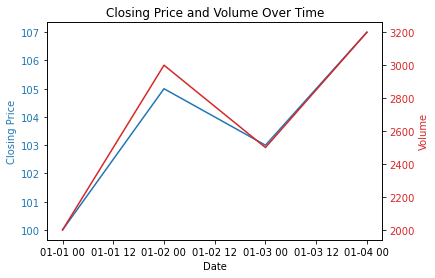

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame
data = pd.DataFrame({
    'Date': ['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04'],
    'Closing_Price': [100, 105, 103, 107],
    'Volume': [2000, 3000, 2500, 3200]
})

# Convert 'Date' to a datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plotting the closing price
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color=color)
ax1.plot(data['Date'], data['Closing_Price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for volume
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Volume', color=color)
ax2.plot(data['Date'], data['Volume'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.title('Closing Price and Volume Over Time')
plt.show()


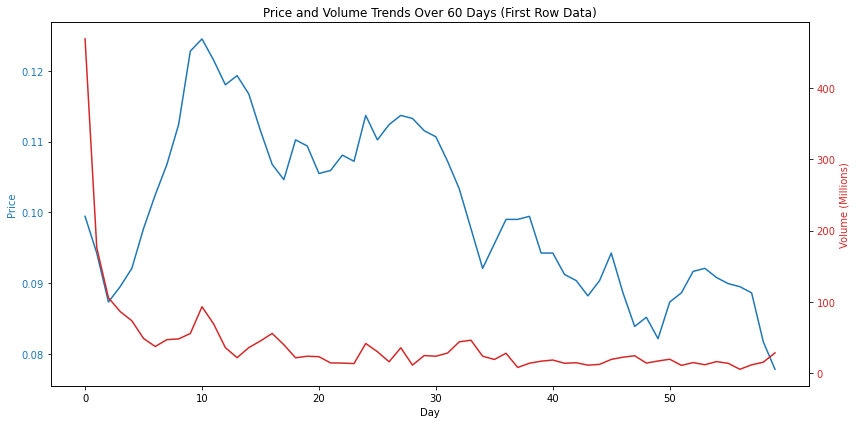

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# Assuming data is already loaded and contains the columns 'price_features' and 'volume_features'
# Extracting the first row's price and volume data
first_row_price_data = ast.literal_eval(df.loc[0, 'price_features'])
first_row_volume_data = ast.literal_eval(df.loc[0, 'volume_features'])

# Converting the volume data to millions for readability
first_row_volume_data_readable = [volume / 1e6 for volume in first_row_volume_data]

# Creating a numeric range for the x-axis representing the days
day_range = range(len(first_row_price_data))

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the price data
color = 'tab:blue'
ax1.set_xlabel('Day')
ax1.set_ylabel('Price', color=color)
ax1.plot(day_range, first_row_price_data, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(0, len(first_row_price_data), 10))  # Setting x-axis ticks at intervals of 10 days

# Creating a second y-axis for the updated volume data
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Volume (Millions)', color=color)
ax2.plot(day_range, first_row_volume_data_readable, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.title('Price and Volume Trends Over 60 Days (First Row Data)')
plt.tight_layout()
plt.show()


In [73]:
price_data = df['price_features'][52].replace('[', '').replace(']', '').replace('\n', '').split(",")
price_data = [float(val) for val in price_data]

price_data = np.array(price_data)
print(price_data)

[0.091667 0.092099 0.090802 0.089937 0.089504 0.08864  0.081722 0.07783
 0.074803 0.07783  0.076965 0.079992 0.083884 0.089072 0.088207 0.089072
 0.092532 0.092099 0.090369 0.08864  0.085613 0.085613 0.084748 0.083884
 0.091235 0.091667 0.089937 0.089072 0.093396 0.095126 0.096423 0.096423
 0.096423 0.091667 0.086478 0.089072 0.095126 0.098585 0.101179 0.100314
 0.09945  0.09772  0.096423 0.098152 0.098152 0.09772  0.097288 0.094694
 0.095991 0.096855 0.094694 0.094694 0.094261 0.092964 0.095126 0.096855
 0.095126 0.098152 0.103774 0.10853 ]


In [74]:
volume_data = df['volume_features'][52].replace('[', '').replace(']', '').replace('\n', '').split(",")
volume_data = [float(val) for val in volume_data]

volume_data = np.array(volume_data)
volume_data = [volume / 1e6 for volume in volume_data]
print(volume_data)

[14.7616, 11.76, 16.1728, 13.7088, 5.376, 11.6032, 15.3216, 28.3808, 29.8592, 59.248, 231.3024, 37.2288, 43.7472, 36.9376, 37.8112, 14.6048, 22.0192, 28.1568, 7.056, 12.2752, 12.2528, 9.9008, 15.9936, 34.0704, 31.4048, 16.4864, 22.8032, 10.6848, 21.952, 12.4992, 33.4656, 16.0608, 6.6528, 34.048, 23.8784, 35.3472, 28.5376, 18.9952, 58.016, 35.056, 38.528, 32.1888, 13.6416, 12.6112, 16.5536, 14.448, 17.5392, 18.9504, 9.3632, 7.9072, 11.9392, 4.256, 4.9056, 4.928, 4.9056, 4.1664, 25.424, 13.2832, 32.2112, 31.4272]


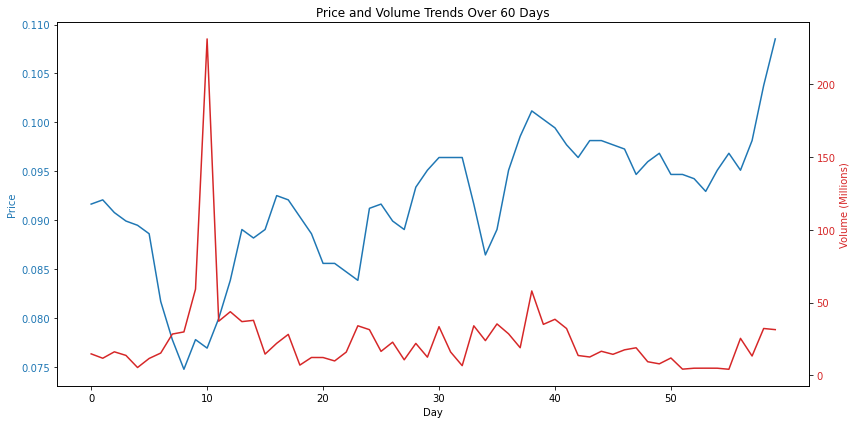

In [75]:
# Creating a numeric range for the x-axis representing the days
day_range = range(len(price_data))

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the price data
color = 'tab:blue'
ax1.set_xlabel('Day')
ax1.set_ylabel('Price', color=color)
ax1.plot(day_range, price_data, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(0, len(price_data), 10))  # Setting x-axis ticks at intervals of 10 days

# Creating a second y-axis for the updated volume data
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Volume (Millions)', color=color)
ax2.plot(day_range, volume_data, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.title('Price and Volume Trends Over 60 Days')
plt.tight_layout()
plt.show()


0.0033844391542514505
19.526141794102756


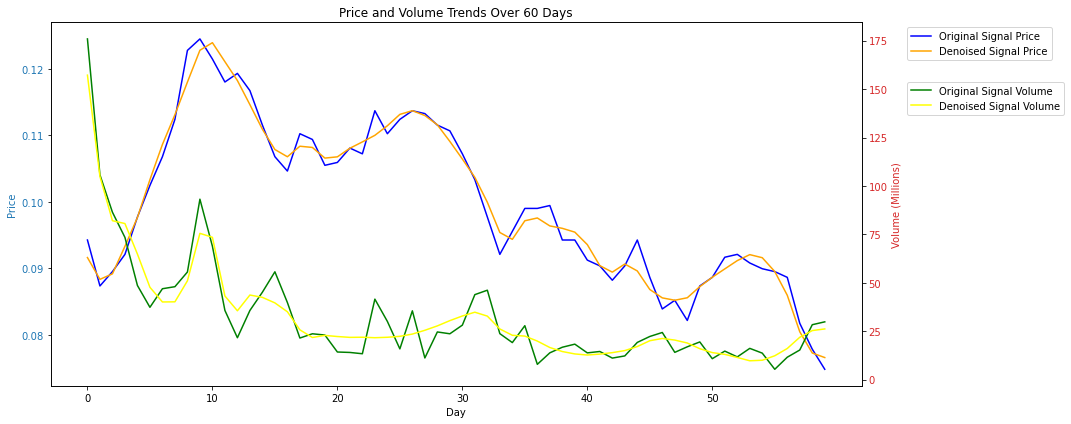

In [63]:
import numpy as np
import pywt
import matplotlib.pyplot as plt

# Rigrsure threshold method
def rigrsure_thresh(data):
    n = len(data)
    sort_data = np.sort(np.abs(data))
    risk = np.zeros(n)
    for i in range(n):
        lambda_i = sort_data[i]
        term1 = (n - 2 * i) * lambda_i**2
        term2 = np.sum(sort_data[:i]**2)
        risk[i] = term1 + term2
    best_idx = np.argmin(risk)
    print(sort_data[best_idx])
    return sort_data[best_idx]

# Wavelet denoising
def wavelet_denoise(data, wavelet='db4', mode='soft', level=2):
    coeffs = pywt.wavedec(data, wavelet, level=level)
    threshold = rigrsure_thresh(coeffs[-1])
    coeffs[1:] = [pywt.threshold(c, threshold, mode=mode) for c in coeffs[1:]]
    return pywt.waverec(coeffs, wavelet)

# Simulate noisy data

denoised_data_price = wavelet_denoise(price_data)
denoised_data_volume = wavelet_denoise(volume_data)


fig, ax1 = plt.subplots(figsize=(15, 6))

# Plotting the price data
ax1.plot(price_data, color='blue', label='Original Signal Price')
ax1.plot(day_range, denoised_data_price, color='orange', label='Denoised Signal Price')

ax1.set_xlabel('Day')
ax1.set_ylabel('Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(range(0, len(denoised_data_price), 10))  # Setting x-axis ticks at intervals of 10 days

# Creating a second y-axis for the updated volume data
ax2 = ax1.twinx()
ax2.plot(volume_data, color='green', label='Original Signal Volume')
ax2.plot(day_range, denoised_data_volume, color='yellow', label='Denoised Signal Volume')

ax2.set_ylabel('Volume (Millions)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Adjusting legends
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 0.85))

# Adjusting layout and showing plot
plt.title('Price and Volume Trends Over 60 Days')
plt.tight_layout()
plt.savefig('price_volume_trends.png')  # Replace 'path_to_save' with your desired file path
plt.show()



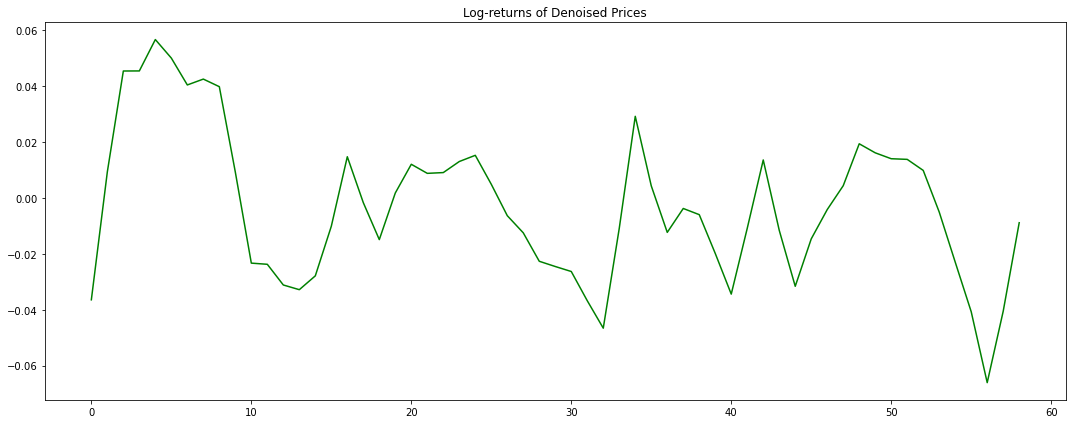

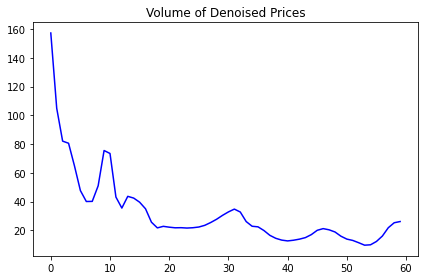

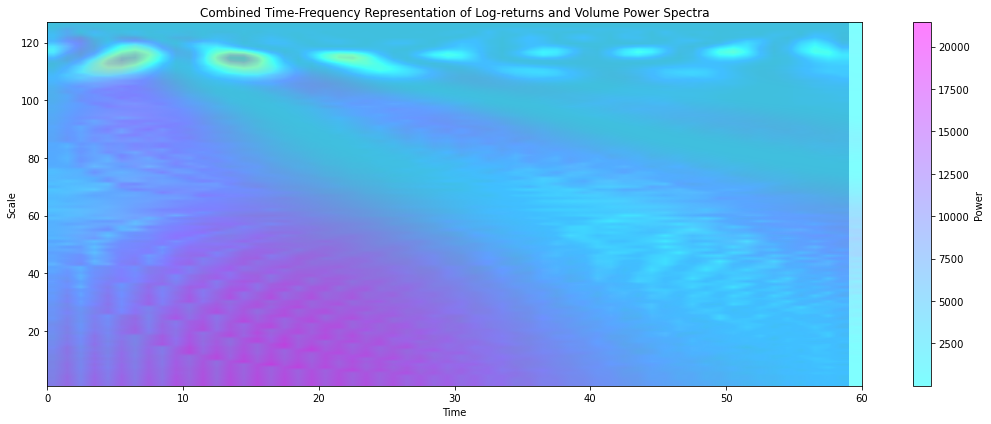

In [71]:
# Calculate log-returns
plt.figure(figsize=(15, 6))
log_returns = np.diff(np.log(denoised_data_price))
plt.plot(log_returns, color='green')
plt.title('Log-returns of Denoised Prices')
plt.tight_layout()
plt.savefig('Log-returns of Denoised Prices.png')  # Replace 'path_to_save' with your desired file path
plt.show()

plt.plot(denoised_data_volume, color='blue')
plt.title('Volume of Denoised Prices')
plt.tight_layout()
plt.savefig('Denoised Volume.png')  # Replace 'path_to_save' with your desired file path
plt.show()


# Compute the continuous wavelet transform (CWT) using Morlet wavelet
widths = np.arange(1, 128)  # arbitrary range of scales
cwtmatr_price, _ = pywt.cwt(log_returns, widths, 'morl')

cwtmatr_volume, _ = pywt.cwt(denoised_data_volume, widths, 'morl')

# Compute the power spectrum
power_spectrum_price = np.real(cwtmatr_price)**2
power_spectrum_volume = np.real(cwtmatr_volume)**2

# Visualization
plt.figure(figsize=(15, 6))

# Plot for Price Power Spectrum
plt.imshow(power_spectrum_price, aspect='auto', extent=[0, len(log_returns), 1, max(widths)], 
           cmap='jet', interpolation='bilinear', alpha=0.5)  # Alpha for transparency

# Plot for Volume Power Spectrum
plt.imshow(power_spectrum_volume, aspect='auto', extent=[0, len(denoised_data_volume), 1, max(widths)], 
           cmap='cool', interpolation='bilinear', alpha=0.5)  # Alpha for transparency

plt.colorbar(label="Power")
plt.ylabel("Scale")
plt.xlabel("Time")
plt.title('Combined Time-Frequency Representation of Log-returns and Volume Power Spectra')
plt.tight_layout()
plt.savefig('price_volume_spectrogram_denoised.png')  # Replace 'path_to_save' with your desired file path
plt.show()



# # Visualization
# plt.figure(figsize=(15, 6))
# plt.imshow(power_spectrum, aspect='auto', extent=[0, len(log_returns), 1, max(widths)], 
#            cmap='jet', interpolation='bilinear')
# plt.colorbar(label="Power")
# plt.ylabel("Scale")
# plt.xlabel("Time")
# plt.title('Time-Frequency Representation of Log-returns Power Spectrum')
# plt.tight_layout()
# plt.show()

In [126]:
# import numpy as np
# import pywt
# import matplotlib.pyplot as plt
# import pandas as pd
# import os

# # Assuming the data you provided is in a DataFrame named df

# # Define Rigrsure threshold method

# def rigrsure_thresh(data):
#     n = len(data)
#     sort_data = np.sort(np.abs(data))
#     risk = np.zeros(n)
#     for i in range(n):
#         lambda_i = sort_data[i]
#         term1 = (n - 2 * i) * lambda_i**2
#         term2 = np.sum(sort_data[:i]**2)
#         risk[i] = term1 + term2
#     best_idx = np.argmin(risk)
# #     print(sort_data[best_idx])
#     return sort_data[best_idx]

# # Wavelet denoising
# def wavelet_denoise(data, wavelet='db4', mode='soft', level=2):
#     coeffs = pywt.wavedec(data, wavelet, level=level)
#     threshold = rigrsure_thresh(coeffs[-1])
#     coeffs[1:] = [pywt.threshold(c, threshold, mode=mode) for c in coeffs[1:]]
#     return pywt.waverec(coeffs, wavelet)



# def generate_spectrogram(data, label, date, save_path):
    
#     log_returns = np.diff(np.log(denoised_data_price))
#     # Compute the continuous wavelet transform (CWT) using Morlet wavelet
    
#     widths = np.arange(1, 128)  # arbitrary range of scales
#     cwtmatr_price, _ = pywt.cwt(log_returns, widths, 'morl')
#     cwtmatr_volume, _ = pywt.cwt(denoised_data_volume, widths, 'morl')
#     # Compute the power spectrum
#     power_spectrum_price = np.real(cwtmatr_price)**2
#     power_spectrum_volume = np.real(cwtmatr_volume)**2
    
    
#     # Visualization
#     plt.figure(figsize=(15, 6))
#     # Plot for Price Power Spectrum
#     plt.imshow(power_spectrum_price, aspect='auto', extent=[0, len(log_returns), 1, max(widths)], 
#            cmap='jet', interpolation='bilinear', alpha=0.5)  # Alpha for transparency
#     # Plot for Volume Power Spectrum
#     plt.imshow(power_spectrum_volume, aspect='auto', extent=[0, len(denoised_data_volume), 1, max(widths)], 
#            cmap='cool', interpolation='bilinear', alpha=0.5)  # Alpha for transparency
#     plt.colorbar(label="Power")
#     plt.ylabel("Scale")
#     plt.xlabel("Time")
#     plt.title('Combined Time-Frequency Representation of Log-returns and Volume Power Spectra')
#     plt.tight_layout()
    
#         # Save the figure in the specified path
#     plt.savefig(save_path)
#     plt.close()  # Close the plot to free up memory
    
    
    
# # Create main directory for storing spectrogram images if it doesn't exist
# main_dir = "spectrogram_images_with_volume"
# if not os.path.exists(main_dir):
#     os.mkdir(main_dir)

# # Loop through the dataset and generate spectrogram images
# for index, row in df.iterrows():
# #     data_str = row['features'].replace('[', '').replace(']', '').replace('\n', '').split()
    
#     price_data = df['price_features'].replace('[', '').replace(']', '').replace('\n', '').split()
#     price_data = [float(val) for val in price_data]
#     price_data = np.array(price_data)

# #     data = [float(val) for val in data_str]
# #     data = np.array(data)
#     volume_data = df['volume_features'].replace('[', '').replace(']', '').replace('\n', '').split()
#     volume_data = [float(val) for val in volume_data]
#     volume_data = np.array(volume_data)
#     volume_data = [volume / 1e6 for volume in volume_data]
    
    
#     label = row['labels']
#     date = row['Date'].strftime('%Y-%m-%d')# format the date as a string for the title
#     print(date)
#     # Create a directory for this label if it doesn't exist
#     label_dir = os.path.join(main_dir, label)
#     if not os.path.exists(label_dir):
#         os.mkdir(label_dir)
    
#     # Specify path to save the spectrogram image
#     save_path = os.path.join(label_dir, f"{date}.png")
    
#     generate_spectrogram(data, label, date, save_path)

In [125]:
# import numpy as np
# import pywt
# import matplotlib.pyplot as plt
# import pandas as pd
# import os

# # Assuming the data you provided is in a DataFrame named df

# # Define Rigrsure threshold method
# def rigrsure_thresh(data):
#     n = len(data)
#     sort_data = np.sort(np.abs(data))
#     risk = np.zeros(n)
#     for i in range(n):
#         lambda_i = sort_data[i]
#         term1 = (n - 2 * i) * lambda_i**2
#         term2 = np.sum(sort_data[:i]**2)
#         risk[i] = term1 + term2
#     best_idx = np.argmin(risk)
#     return sort_data[best_idx]

# # Wavelet denoising
# def wavelet_denoise(data, wavelet='db4', mode='soft', level=2):
#     coeffs = pywt.wavedec(data, wavelet, level=level)
#     threshold = rigrsure_thresh(coeffs[-1])
#     coeffs[1:] = [pywt.threshold(c, threshold, mode=mode) for c in coeffs[1:]]
#     return pywt.waverec(coeffs, wavelet)

# def generate_spectrogram(log_returns, denoised_data_volume, label, date, save_path):
#     # Compute the continuous wavelet transform (CWT) using Morlet wavelet
#     widths = np.arange(1, 128)  # arbitrary range of scales
#     cwtmatr_price, _ = pywt.cwt(log_returns, widths, 'morl')
#     cwtmatr_volume, _ = pywt.cwt(denoised_data_volume, widths, 'morl')
#     # Compute the power spectrum
#     power_spectrum_price = np.real(cwtmatr_price)**2
#     power_spectrum_volume = np.real(cwtmatr_volume)**2
    
#     # Visualization
#     plt.figure(figsize=(15, 6))
#     # Plot for Price Power Spectrum
#     plt.imshow(power_spectrum_price, aspect='auto', extent=[0, len(log_returns), 1, max(widths)], 
#            cmap='jet', interpolation='bilinear', alpha=0.5)  # Alpha for transparency
#     # Plot for Volume Power Spectrum
#     plt.imshow(power_spectrum_volume, aspect='auto', extent=[0, len(denoised_data_volume), 1, max(widths)], 
#            cmap='cool', interpolation='bilinear', alpha=0.5)  # Alpha for transparency
# #     plt.colorbar(label="Power")
# #     plt.ylabel("Scale")
# #     plt.xlabel("Time")
# #     plt.title('Combined Time-Frequency Representation of Log-returns and Volume Power Spectra')
#     plt.tight_layout()
    
#     # Save the figure in the specified path
#     plt.savefig(save_path)
#     plt.close()  # Close the plot to free up memory

# # Create main directory for storing spectrogram images if it doesn't exist
# main_dir = "spectrogram_images_with_volume_1"
# if not os.path.exists(main_dir):
#     os.mkdir(main_dir)

# # Loop through the dataset and generate spectrogram images
# for index, row in df.iterrows():
#     # Extract price and volume data from the DataFrame row
#     price_data = row['price_features']
#     volume_data = row['volume_features']
    
#     # Convert data from string to list of floats
#     price_data = [float(val) for val in price_data.strip('[]').replace('\n', '').split(',')]
#     volume_data = [float(val) for val in volume_data.strip('[]').replace('\n', '').split(',')]
    
#     volume_data = [volume / 1e6 for volume in volume_data]  # Assuming volume is in millions
    
#     label = row['labels']
    
#     # Convert 'Date' to datetime object
#     date = pd.to_datetime(row['Date']).strftime('%Y-%m-%d')  # format the date as a string for the title
    
#     # Apply denoising to log-returns
#     log_returns = np.diff(np.log(wavelet_denoise(price_data)))
#     denoised_data_volume = wavelet_denoise(volume_data)
    
#     # Create a directory for this label if it doesn't exist
#     label_dir = os.path.join(main_dir, label)
#     if not os.path.exists(label_dir):
#         os.mkdir(label_dir)
    
#     # Specify path to save the spectrogram image
#     save_path = os.path.join(label_dir, f"{date}.png")    
#     generate_spectrogram(log_returns, denoised_data_volume, label, date, save_path)


In [128]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import pandas as pd
import os

# Assuming the data you provided is in a DataFrame named df

# Define Rigrsure threshold method
def rigrsure_thresh(data):
    n = len(data)
    sort_data = np.sort(np.abs(data))
    risk = np.zeros(n)
    for i in range(n):
        lambda_i = sort_data[i]
        term1 = (n - 2 * i) * lambda_i**2
        term2 = np.sum(sort_data[:i]**2)
        risk[i] = term1 + term2
    best_idx = np.argmin(risk)
    return sort_data[best_idx]

# Wavelet denoising
def wavelet_denoise(data, wavelet='db4', mode='soft', level=2):
    coeffs = pywt.wavedec(data, wavelet, level=level)
    threshold = rigrsure_thresh(coeffs[-1])
    coeffs[1:] = [pywt.threshold(c, threshold, mode=mode) for c in coeffs[1:]]
    return pywt.waverec(coeffs, wavelet)

def generate_spectrogram(log_returns, denoised_data_volume, label, date, save_path):
    # Compute the continuous wavelet transform (CWT) using Morlet wavelet
    widths = np.arange(1, 128)  # arbitrary range of scales
    cwtmatr_price, _ = pywt.cwt(log_returns, widths, 'morl')
    cwtmatr_volume, _ = pywt.cwt(denoised_data_volume, widths, 'morl')
    # Compute the power spectrum
    power_spectrum_price = np.real(cwtmatr_price)**2
    power_spectrum_volume = np.real(cwtmatr_volume)**2
    
    # Visualization
    plt.figure(figsize=(15, 6))
    # Plot for Price Power Spectrum
    plt.imshow(power_spectrum_price, aspect='auto', extent=[0, len(log_returns), 1, max(widths)], 
           cmap='jet', interpolation='bilinear', alpha=0.5)  # Alpha for transparency
    # Plot for Volume Power Spectrum
    plt.imshow(power_spectrum_volume, aspect='auto', extent=[0, len(denoised_data_volume), 1, max(widths)], 
           cmap='cool', interpolation='bilinear', alpha=0.5)  # Alpha for transparency
    plt.axis('off')  # Turn off axis ticks and labels
    plt.tight_layout()
    
    # Save the figure in the specified path
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.close()  # Close the plot to free up memory

# Create main directory for storing spectrogram images if it doesn't exist
main_dir = "spectrogram_images_with_volume_1"
if not os.path.exists(main_dir):
    os.mkdir(main_dir)

# Loop through the dataset and generate spectrogram images
for index, row in df.iterrows():
    # Extract price and volume data from the DataFrame row
    price_data = row['price_features']
    volume_data = row['volume_features']
    
    # Convert data from string to list of floats
    price_data = [float(val) for val in price_data.strip('[]').replace('\n', '').split(',')]
    volume_data = [float(val) for val in volume_data.strip('[]').replace('\n', '').split(',')]
    
    volume_data = [volume / 1e6 for volume in volume_data]  # Assuming volume is in millions
    
    label = row['labels']
    
    # Convert 'Date' to datetime object
    date = pd.to_datetime(row['Date']).strftime('%Y-%m-%d')  # format the date as a string for the title
    
    # Apply denoising to log-returns
    log_returns = np.diff(np.log(wavelet_denoise(price_data)))
    denoised_data_volume = wavelet_denoise(volume_data)
    
    # Create a directory for this label if it doesn't exist
    label_dir = os.path.join(main_dir, label)
    if not os.path.exists(label_dir):
        os.mkdir(label_dir)
    
    # Specify path to save the spectrogram image
    save_path = os.path.join(label_dir, f"{date}.png")    
    generate_spectrogram(log_returns, denoised_data_volume, label, date, save_path)


## NoDenoised Signal 

In [ ]:
price_data = df['price_features'][0].replace('[', '').replace(']', '').replace('\n', '').split(",")
price_data = [float(val) for val in price_data]

price_data = np.array(price_data)
print(price_data)

In [ ]:
volume_data = df['volume_features'][0].replace('[', '').replace(']', '').replace('\n', '').split(",")
volume_data = [float(val) for val in volume_data]

volume_data = np.array(volume_data)
volume_data = [volume / 1e6 for volume in volume_data]
print(volume_data)

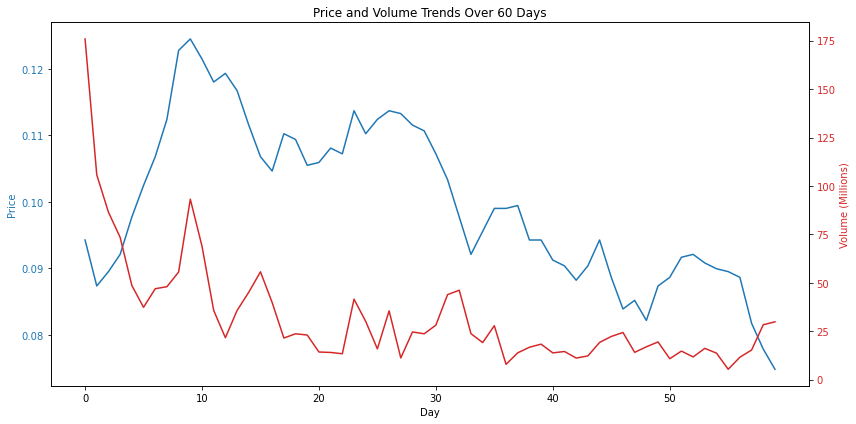

In [65]:
# Creating a numeric range for the x-axis representing the days
day_range = range(len(price_data))

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the price data
color = 'tab:blue'
ax1.set_xlabel('Day')
ax1.set_ylabel('Price', color=color)
ax1.plot(day_range, price_data, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(0, len(price_data), 10))  # Setting x-axis ticks at intervals of 10 days

# Creating a second y-axis for the updated volume data
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Volume (Millions)', color=color)
ax2.plot(day_range, volume_data, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.title('Price and Volume Trends Over 60 Days')
plt.tight_layout()
plt.show()


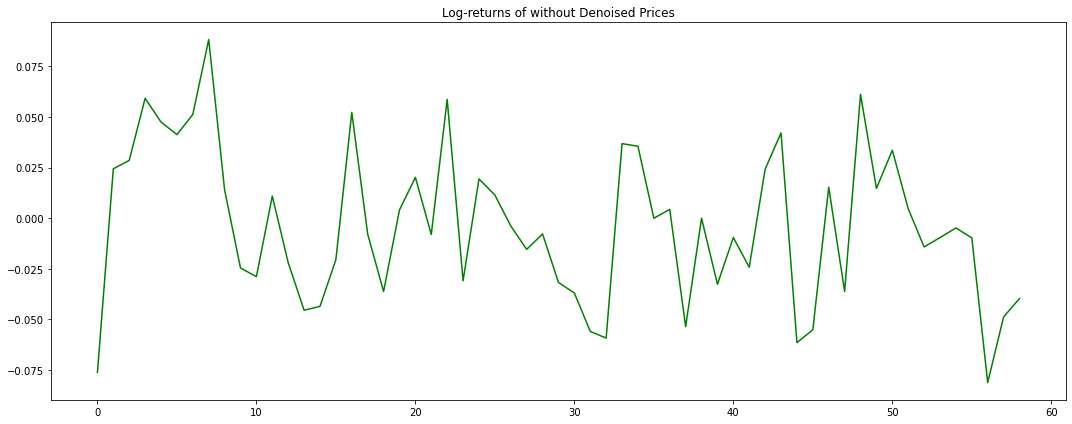

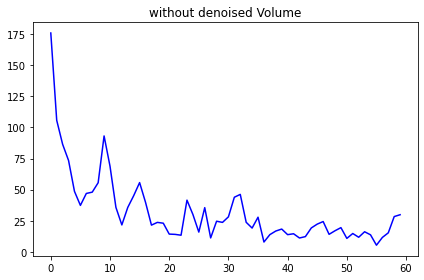

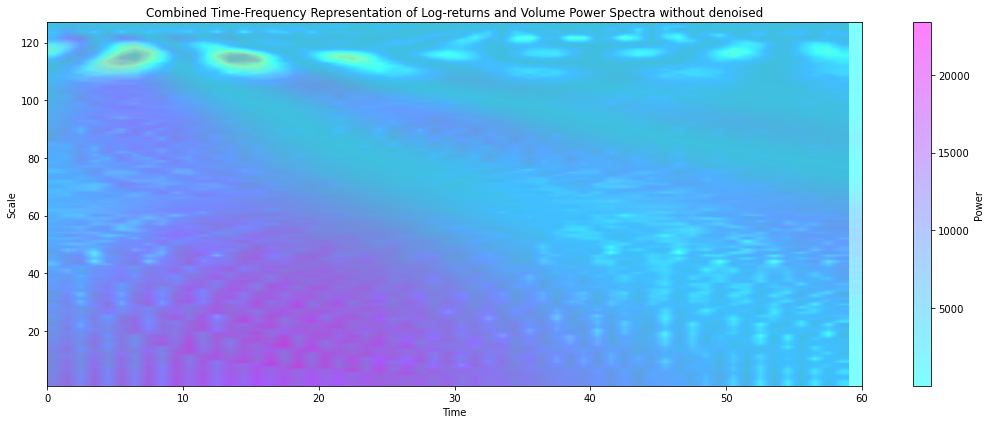

In [72]:
# Calculate log-returns
plt.figure(figsize=(15, 6))
log_returns = np.diff(np.log(price_data))
plt.plot(log_returns, color='green')
plt.title('Log-returns of without Denoised Prices')
plt.tight_layout()
plt.savefig('Log-returns of without Denoised Prices')  # Replace 'path_to_save' with your desired file path
plt.show()

plt.plot(volume_data, color='blue')
plt.title('without denoised Volume')
plt.tight_layout()
plt.savefig('without denoised Volume')  # Replace 'path_to_save' with your desired file path
plt.show()


# Compute the continuous wavelet transform (CWT) using Morlet wavelet
widths = np.arange(1, 128)  # arbitrary range of scales
cwtmatr_price, _ = pywt.cwt(log_returns, widths, 'morl')

cwtmatr_volume, _ = pywt.cwt(volume_data, widths, 'morl')

# Compute the power spectrum
power_spectrum_price = np.real(cwtmatr_price)**2
power_spectrum_volume = np.real(cwtmatr_volume)**2

# Visualization
plt.figure(figsize=(15, 6))

# Plot for Price Power Spectrum
plt.imshow(power_spectrum_price, aspect='auto', extent=[0, len(log_returns), 1, max(widths)], 
           cmap='jet', interpolation='bilinear', alpha=0.5)  # Alpha for transparency

# Plot for Volume Power Spectrum
plt.imshow(power_spectrum_volume, aspect='auto', extent=[0, len(volume_data), 1, max(widths)], 
           cmap='cool', interpolation='bilinear', alpha=0.5)  # Alpha for transparency

plt.colorbar(label="Power")
plt.ylabel("Scale")
plt.xlabel("Time")
plt.title('Combined Time-Frequency Representation of Log-returns and Volume Power Spectra without denoised')
plt.tight_layout()
plt.savefig('price_volume_spectrogram.png')  # Replace 'path_to_save' with your desired file path
plt.show()



# # Visualization
# plt.figure(figsize=(15, 6))
# plt.imshow(power_spectrum, aspect='auto', extent=[0, len(log_returns), 1, max(widths)], 
#            cmap='jet', interpolation='bilinear')
# plt.colorbar(label="Power")
# plt.ylabel("Scale")
# plt.xlabel("Time")
# plt.title('Time-Frequency Representation of Log-returns Power Spectrum')
# plt.tight_layout()
# plt.show()

In [129]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import pandas as pd
import os


def generate_spectrogram(log_returns, volume_data, label, date, save_path):
    # Compute the continuous wavelet transform (CWT) using Morlet wavelet
    widths = np.arange(1, 128)  # arbitrary range of scales
    cwtmatr_price, _ = pywt.cwt(log_returns, widths, 'morl')
    cwtmatr_volume, _ = pywt.cwt(volume_data, widths, 'morl')
    # Compute the power spectrum
    power_spectrum_price = np.real(cwtmatr_price)**2
    power_spectrum_volume = np.real(cwtmatr_volume)**2
    
    # Visualization
    plt.figure(figsize=(15, 6))
    # Plot for Price Power Spectrum
    plt.imshow(power_spectrum_price, aspect='auto', extent=[0, len(log_returns), 1, max(widths)], 
           cmap='jet', interpolation='bilinear', alpha=0.5)  # Alpha for transparency
    # Plot for Volume Power Spectrum
    plt.imshow(power_spectrum_volume, aspect='auto', extent=[0, len(denoised_data_volume), 1, max(widths)], 
           cmap='cool', interpolation='bilinear', alpha=0.5)  # Alpha for transparency
    plt.axis('off')  # Turn off axis ticks and labels
    plt.tight_layout()
    
    # Save the figure in the specified path
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.close()  # Close the plot to free up memory

# Create main directory for storing spectrogram images if it doesn't exist
main_dir = "spectrogram_images_with_volume_without_denoised"
if not os.path.exists(main_dir):
    os.mkdir(main_dir)

# Loop through the dataset and generate spectrogram images
for index, row in df.iterrows():
    # Extract price and volume data from the DataFrame row
    price_data = row['price_features']
    volume_data = row['volume_features']
    
    # Convert data from string to list of floats
    price_data = [float(val) for val in price_data.strip('[]').replace('\n', '').split(',')]
    volume_data = [float(val) for val in volume_data.strip('[]').replace('\n', '').split(',')]
    
    volume_data = [volume / 1e6 for volume in volume_data]  # Assuming volume is in millions
    
    label = row['labels']
    
    # Convert 'Date' to datetime object
    date = pd.to_datetime(row['Date']).strftime('%Y-%m-%d')  # format the date as a string for the title
    
    # Apply denoising to log-returns
    log_returns = np.diff(np.log(price_data))
    
    # Create a directory for this label if it doesn't exist
    label_dir = os.path.join(main_dir, label)
    if not os.path.exists(label_dir):
        os.mkdir(label_dir)
    
    # Specify path to save the spectrogram image
    save_path = os.path.join(label_dir, f"{date}.png")    
    generate_spectrogram(log_returns, volume_data, label, date, save_path)
